In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1: Clustering
----------

## Problem Statement:
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage. 

## Data Dictionary for Market Segmentation:
1.	spending: Amount spent by the customer per month (in 1000s)
2.	advance_payments: Amount paid by the customer in advance by cash (in 100s)
3.	probability_of_full_payment: Probability of payment done in full by the customer to the bank
4.	current_balance: Balance amount left in the account to make purchases (in 1000s)
5.	credit_limit: Limit of the amount in credit card (10000s)
6.	min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7.	max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

# ---------------------------------------------------------------------------------------------

### Question 1

Read the data and do exploratory data analysis. Describe the data briefly.

In [2]:
# Importing the data set
bank_df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
# Checking if the data is imported
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
# Checking the shape of data
bank_df.shape

(210, 7)

In [5]:
# Checking the columns in the data set
bank_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [6]:
# Since the data are in different scales we will multiply by their factors and then proceed
scales = [1000, 100, 1, 1000, 10000, 100, 1000]
counter = 0
for col in bank_df.columns:
    bank_df[col] = bank_df[col]*scales[counter]
    counter+=1

In [7]:
# Checking head for multiplied data
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


In [8]:
# Getting the info of the data
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [9]:
# 5 Number summary of the data
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14847.523810,2909.699431,10590.0000,12270.0000,14355.00000,17305.000000,21180.0000
advance_payments,210.0,1455.928571,130.595873,1241.0000,1345.0000,1432.00000,1571.500000,1725.0000
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.8569,0.87345,0.887775,0.9183
current_balance,210.0,5628.533333,443.063478,4899.0000,5262.2500,5523.50000,5979.750000,6675.0000
credit_limit,210.0,32586.047619,3777.144449,26300.0000,29440.0000,32370.00000,35617.500000,40330.0000
min_payment_amt,210.0,370.020095,150.355713,76.5100,256.1500,359.90000,476.875000,845.6000
max_spent_in_single_shopping,210.0,5408.071429,491.480499,4519.0000,5045.0000,5223.00000,5877.000000,6550.0000


In [10]:
# Looking for missing values
bank_df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

-----
### Univariate Analysis

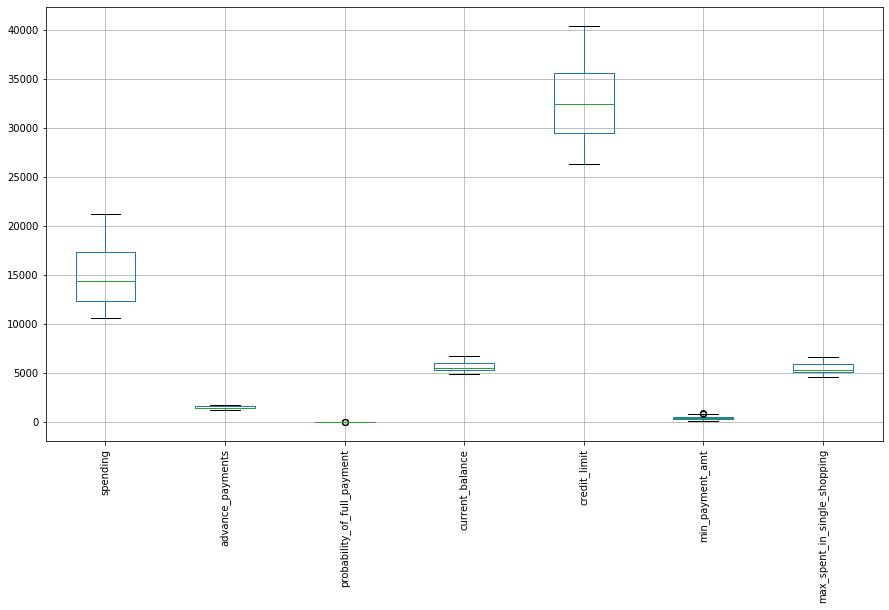

In [11]:
# Plotting the box plot for each variable
plt.figure(figsize=(15,8))
bank_df.boxplot(rot=90)

In [12]:
# User defined function to get upper and lower whisker values for each column
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

spending


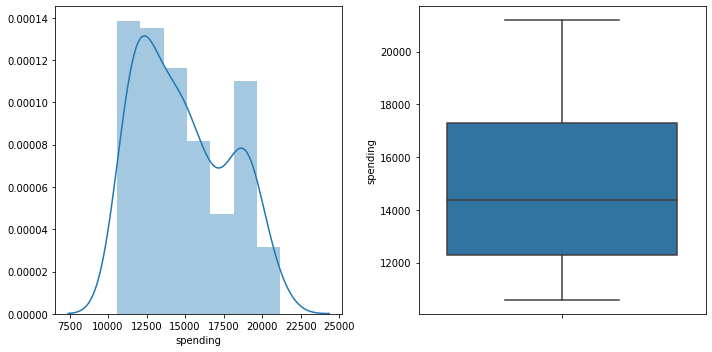

spending is Positive or Right skewed.
The number of outliers in spending is 0

---------------------------------------------------------------------------------------
advance_payments


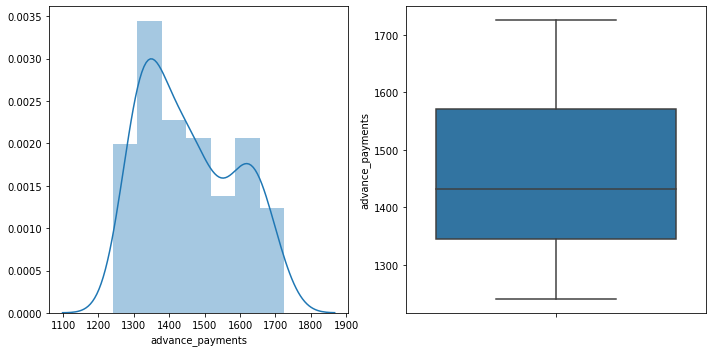

advance_payments is Positive or Right skewed.
The number of outliers in advance_payments is 0

---------------------------------------------------------------------------------------
probability_of_full_payment


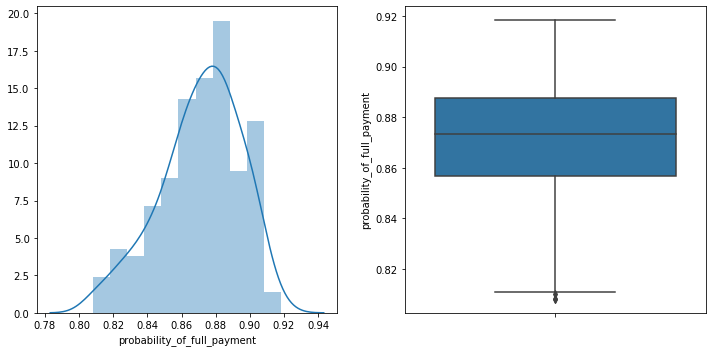

probability_of_full_payment is Negative or Left skewed.
The number of outliers in probability_of_full_payment is 3

---------------------------------------------------------------------------------------
current_balance


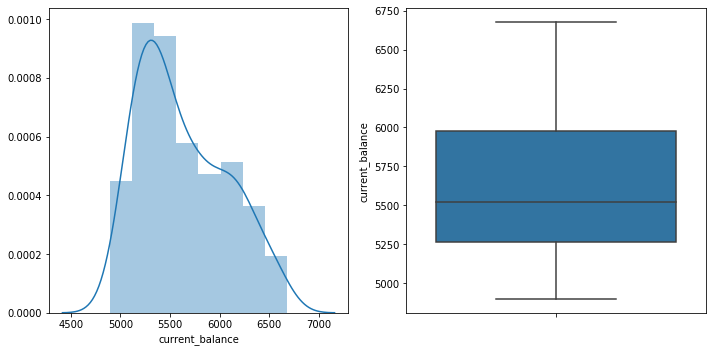

current_balance is Positive or Right skewed.
The number of outliers in current_balance is 0

---------------------------------------------------------------------------------------
credit_limit


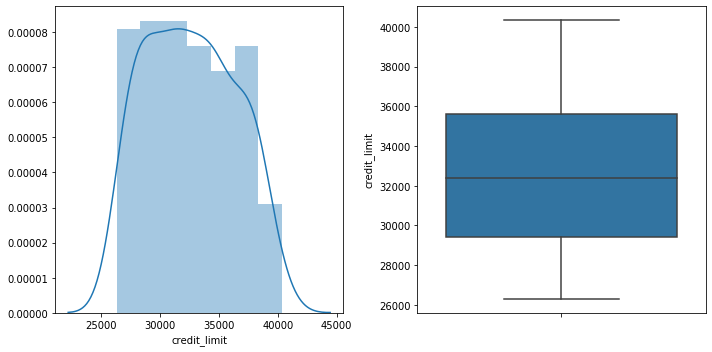

credit_limit is Positive or Right skewed.
The number of outliers in credit_limit is 0

---------------------------------------------------------------------------------------
min_payment_amt


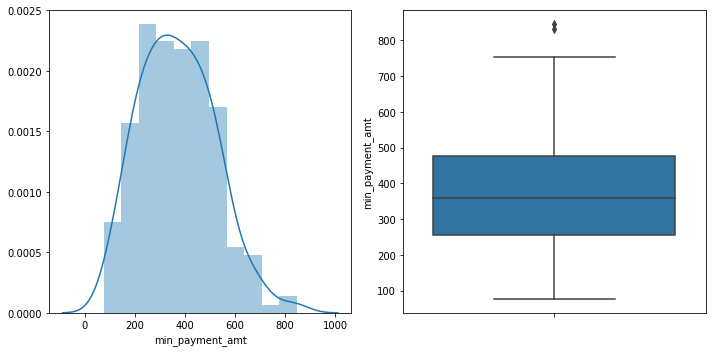

min_payment_amt is Positive or Right skewed.
The number of outliers in min_payment_amt is 2

---------------------------------------------------------------------------------------
max_spent_in_single_shopping


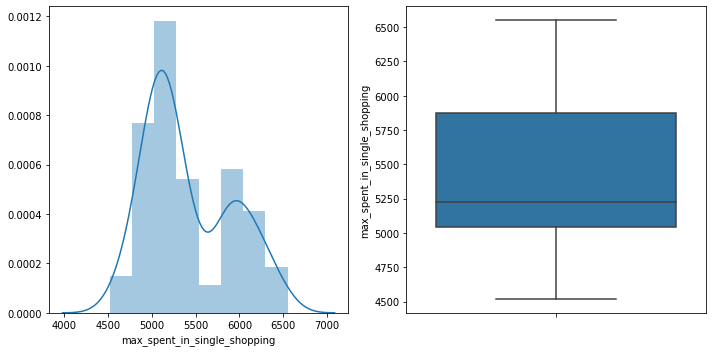

max_spent_in_single_shopping is Positive or Right skewed.
The number of outliers in max_spent_in_single_shopping is 0

---------------------------------------------------------------------------------------


In [13]:
# Univariate analysis that plots the distribution plot, barplot, skewness and the number of outliers
data = bank_df.copy()
for i in data:
    print('\033[1m'+i+'\033[1m')
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10,5)
    sns.distplot(data[i] , ax=axes[:][0], label=i)
    sns.boxplot(data[i] , orient = "v" , ax=axes[:][1])
    plt.tight_layout()
    plt.show()
    skew = data[i].skew()
    if(skew > 0):
        print('%s is Positive or Right skewed.' %(i))
    elif(skew < 0):
        print('%s is Negative or Left skewed.' %(i))
    else:
        print('%s is not skewed.' %(i))
    lratio,uratio=remove_outlier(data[i])
    print('The number of outliers in %s is %d\n'% (i,((data[i]>uratio) | (data[i]<lratio)).sum()))
    print('---------------------------------------------------------------------------------------')

-----
### Multivariate Analysis

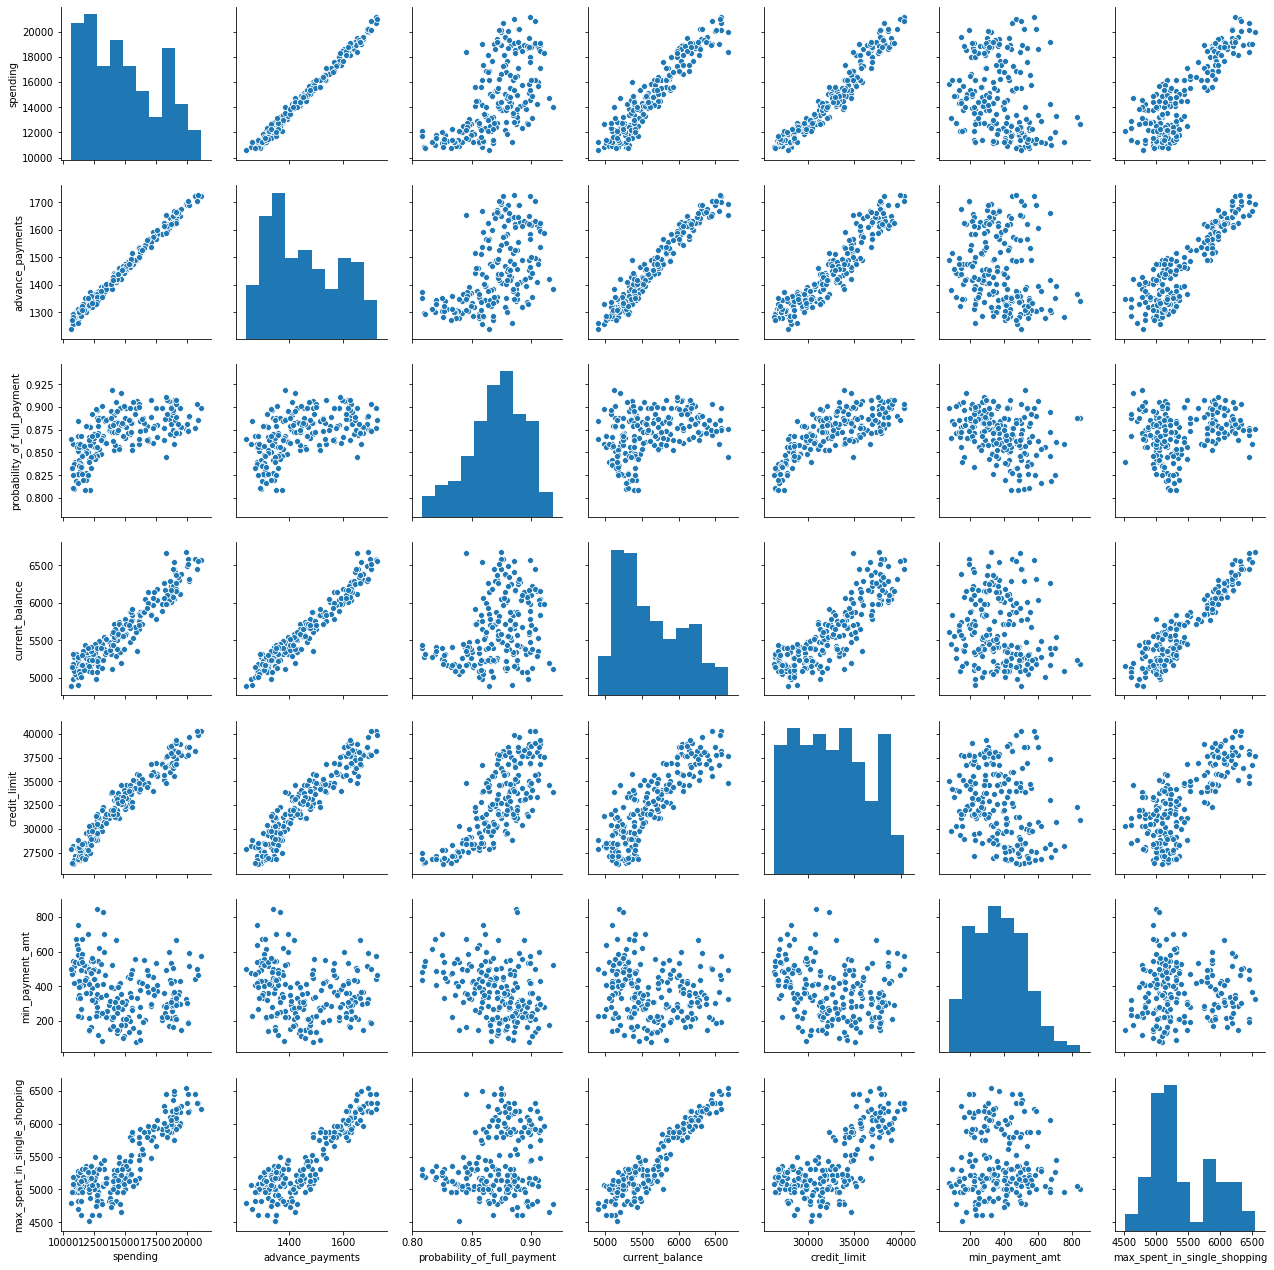

In [14]:
# Pairplot for the data
sns.pairplot(bank_df)

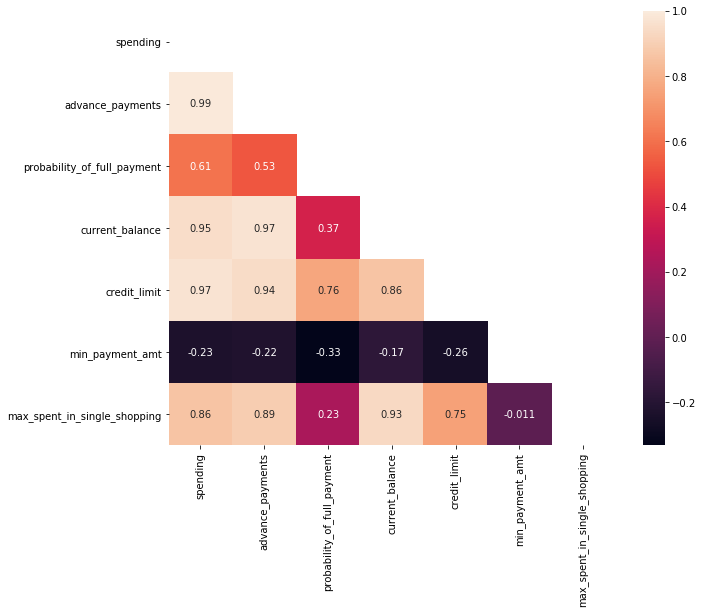

In [15]:
# Gettting the correlation between variable and plotting a heatmap (for ease of visualization)
corr = bank_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, mask=mask)

**Findings:**

1. The data has 210 entries and 7 variables.
2. The columns in the data are:
        - 'spending'
        - 'advance_payments'
        - 'probability_of_full_payment'
        - 'current_balance'
        - 'credit_limit'
        - 'min_payment_amt'
        - 'max_spent_in_single_shopping'
3. All the columns are of 'float' data type.
4. There are 2 variables that have outliers are 'probability_of_full_payment' and 'min_payment_amt'.
5. It can also be observed that the variables are having different magnitudes and so there could be a requirement to scale when we perform weight/distance based models. Ex: Spends go upto 21 while probability vary from 0.8 to 0.9. This may cause issues in distance/weight based models.
6. The number of outliers in the above 2 variables are:
        - probability_of_full_payment:3
        - min_payment_amt: 2
7. The variable, 'probability_of_full_payment', is very slightly left skewed and all other varaibles are very slightly right skewed.
8. There are no null/missing values in the given data set.
9. Variables like 'spending', 'advance_payments' and 'max_spent_in_single_shopping' are multi-modal.
10. From the scatter plot it can be observed that many variables are correlated. To get a detailed picture of the same, let us compute the correlation coefficients and plot the heatmap.
11. The following can be proposed from the heat map:
          - min_payment_amt has a slightly negative correlation with all the variables
          - advance_payments and spending has the highest correlation (close to ~1)
          - current_balance and advance_payments are highly positively correlated
          - current_balance and spending are highly positively correlated
          - credit_limit and advance_payments are highly positively correlated
          - credit_limit and spending are highly positively correlated
          - credit_limit and max_spent_in_single_shopping are highly positively correlated
**On the whole the variables are highly positively correlated except for min_payment_amt**

# ---------------------------------------------------------------------------------------------

### Question 2

Do you think scaling is necessary for clustering in this case? Justify

Yes, scaling is necessary. We need to scale the data because clustering methods is a distance based model and if the values are taken on different magnitudes then the one with the higher magnitude will affect the distance more than the one with lower. Some variables are in the range 0.8-0.9 and some in the range 10-21 so scaling is the best way we can give equal weightage to all variables.

#### Scaling:
We will treat outliers and then proceed with scaling the data.

The number of outliers in the above 2 variables are:
 - probability_of_full_payment: 3
 - min_payment_amt: 2

In [16]:
# # Outlier treatment
# lratio,uratio=remove_outlier(bank_df['probability_of_full_payment'])
# bank_df['probability_of_full_payment']=np.where(bank_df['probability_of_full_payment']>uratio,uratio,bank_df['probability_of_full_payment'])
# bank_df['probability_of_full_payment']=np.where(bank_df['probability_of_full_payment']<lratio,lratio,bank_df['probability_of_full_payment'])

# lratio,uratio=remove_outlier(bank_df['min_payment_amt'])
# bank_df['min_payment_amt']=np.where(bank_df['min_payment_amt']>uratio,uratio,bank_df['min_payment_amt'])
# bank_df['min_payment_amt']=np.where(bank_df['min_payment_amt']<lratio,lratio,bank_df['min_payment_amt'])

In [17]:
# # Checking for outlier using box plot
# plt.figure(figsize=(15,8))
# bank_df.boxplot(rot=90)

**Post outlier treatment and scaling, the number of outliers were still observed in the variables. Hence, we will proceed without outlier treatment.**

In [18]:
# Scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler

# Creating an instance of Standard Scaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(bank_df), columns=bank_df.columns)
data_scaled

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


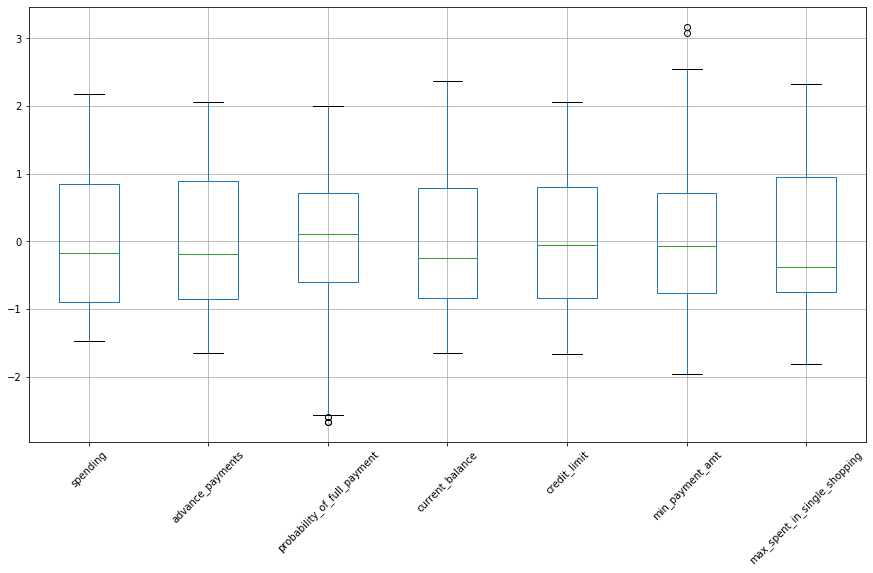

In [19]:
# Cross checking if the data is scaled
plt.figure(figsize=(15,8))
data_scaled.boxplot(rot=45)

# ---------------------------------------------------------------------------------------------

### Question 3

Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [20]:
# Importing the packages for hierarchical clustering using scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
# Creating a linkage with method as ward
wardlink = linkage(data_scaled, method = 'ward')

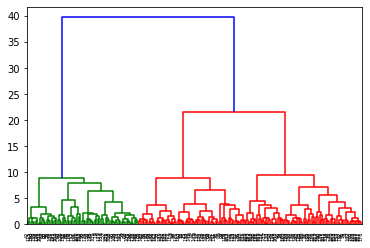

In [22]:
# This shows the dendogram of the entire data set
dend = dendrogram(wardlink)

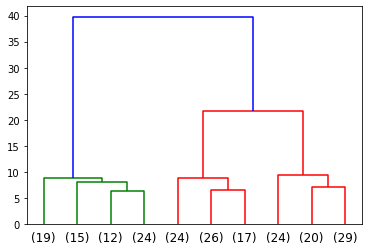

In [23]:
# Since the above graph looks too clumsy, lets look at the last 10 splits
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

The vertical lines are the tallest between 10-20.

So, visually it looks like 3 clusters would be a good split in the data.

In [24]:
# In order to get the cluster that each observation belongs to
from scipy.cluster.hierarchy import fcluster

In [25]:
# Here we mention the linkage instance and the number of clusters and the criterion as maxclust
# Taking number of clusters as 3
clusters = fcluster(wardlink, 3, criterion='maxclust')

In [26]:
# Creating a new column containing the clusters each row belongs to
bank_df_hierarch_3 = bank_df.copy()
bank_df_hierarch_3['cluster_hierarchical'] = clusters

In [27]:
# Cluster profiling
profiling_hierarch_3 = pd.DataFrame(bank_df_hierarch_3.groupby(by='cluster_hierarchical').mean())
profiling_hierarch_3["Count"] = bank_df_hierarch_3['cluster_hierarchical'] .value_counts()
profiling_hierarch_3

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Count
cluster_hierarchical,,,,,,,,
1,18371.428571,1614.542857,0.884400,6158.171429,36846.285714,363.915714,6017.371429,70
2,11872.388060,1325.701493,0.848072,5238.940299,28485.373134,494.943284,5122.208955,67
3,14199.041096,1423.356164,0.879190,5478.232877,32264.520548,261.218082,5086.178082,73


On trying with 4 clusters we get an interesting perspective of the data.

In [28]:
# Taking number of clusters as 4
clusters = fcluster(wardlink, 4, criterion='maxclust')

In [29]:
# Creating a new column containing the clusters each row belongs to
bank_df_hierarch_4 = bank_df.copy()
bank_df_hierarch_4['cluster_hierarchical'] = clusters

In [30]:
# Cluster profiling
profiling_hierarch_4 = pd.DataFrame(bank_df_hierarch_4.groupby(by='cluster_hierarchical').mean())
profiling_hierarch_4["Count"] = bank_df_hierarch_4['cluster_hierarchical'] .value_counts()
profiling_hierarch_4

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Count
cluster_hierarchical,,,,,,,,
1,18371.428571,1614.542857,0.884400,6158.171429,36846.285714,363.915714,6017.371429,70
2,11872.388060,1325.701493,0.848072,5238.940299,28485.373134,494.943284,5122.208955,67
3,12798.750000,1356.541667,0.873313,5254.458333,30400.000000,237.112917,4894.000000,24
4,14884.897959,1456.081633,0.882069,5587.836735,33177.755102,273.024694,5180.306122,49


#### Promotional Strategies:
-	The clusters low 1 and low 2 are much the same in terms of current_balance etc but the probability_of_full_payment and min_payment_amount are a lot different. Since low 2 has a good probability we need to increase their spends by giving offers on single large spends as that is also less in this cluster when compared to low 1. This will boost the total spends.
-	Low 2 also has a very small fraction of customers in spite of the exceptionally good probability and credit limit.
-	Medium needs to be carefully gauged as there are high single spends and the current_balance is quite comparable to the low clusters. So the bank must look out for defaulters.
-	The advance_payment for high is more and that could be a reason for less customers in that cluster.

# ---------------------------------------------------------------------------------------------

### Question 4

Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [31]:
# Importing the required packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
# In k-means we need to mention the number of clusters
# Let us first plot the WSS plot to find the optimum number of clusters
wss = []
sil_score = [1]
for i in range(1,11):
    k_mean = KMeans(n_clusters=i)
    k_mean.fit(data_scaled)
    wss.append(k_mean.inertia_)
    labels = k_mean.labels_
    if i != 1:
        sil_score.append(silhouette_score(data_scaled,labels))

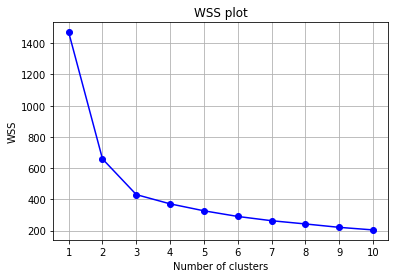

In [33]:
# Plotting the WSS graph
plt.plot(range(1,11), wss, 'bo-' )
plt.title("WSS plot")
plt.ylabel("WSS")
plt.xlabel("Number of clusters")
plt.xticks(range(1,11))
plt.grid()

From the WSS plot we can say that 3 clusters is a good split. However, we can cross check with the WSS values and the drop.

In [34]:
# Viewing the WSS scores
pd.DataFrame(data={"Number of Clusters": np.arange(1,11),
                   "WSS": wss,
                   "Silhouette Score":sil_score})

,Number of Clusters,WSS,Silhouette Score
0,1,1470.000000,1.000000
1,2,659.171754,0.465772
2,3,430.658973,0.400727
3,4,371.385091,0.327655
4,5,327.000859,0.285024
5,6,290.785179,0.273454
6,7,263.506743,0.269483
7,8,242.824079,0.261580
8,9,221.050768,0.251802
9,10,204.617116,0.263417


In the split from 3 to 4 clusters, the drop in WSS is very less. So we can confirm that 3 clusters is a good split.
# ---------------------------------------------------------------------------------------------

### Question 5

Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [35]:
# Obtaining the clusters for number of clusters = 3
k_mean = KMeans(n_clusters=3)
k_mean.fit(data_scaled)
k_mean.inertia_
labels = k_mean.labels_

In [36]:
# Creating a new column with the cluster numbers corresponding to each row
bank_df_kmean = bank_df.copy()
bank_df_kmean['cluster_kmean'] = labels

In [37]:
# Silhouette score for 3 clsuters
silhouette_score(data_scaled,labels)

0.4007270552751299

In [38]:
# Let us calculate the silhouette width for each row and find the min and max value to verify that the split is done correctly
sil_width = silhouette_samples(data_scaled,labels)
bank_df_kmean['sil_width'] = sil_width
bank_df_kmean['sil_width'].min(), bank_df_kmean['sil_width'].max()

(0.002713089347678845, 0.6392852347162193)

Since the smallest silhouette score is positive we can conlcude that the split is valid and there is/are no data in the wrong clsuter.

In [39]:
# Cluster profiling
profiling_kmean = pd.DataFrame(bank_df_kmean.groupby(by='cluster_kmean').mean())
profiling_kmean["Count"] = bank_df_kmean['cluster_kmean'] .value_counts()
profiling_kmean

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Count
cluster_kmean,,,,,,,,,
0,14437.887324,1433.774648,0.881597,5514.577465,32592.253521,270.734085,5120.802817,0.339816,71
1,18495.373134,1620.343284,0.884210,6175.686567,36975.373134,363.237313,6041.701493,0.468772,67
2,11856.944444,1324.777778,0.848253,5231.750000,28495.416667,474.238889,5101.722222,0.397473,72


### Promotional Strategies

-	The medium cluster and the high cluster have almost same probability_of_full_payment but have a very huge difference in min_payment_amt. Since we know that this medium cluster will pay back full payment, we can increase the min payment somewhere close to that of high cluster so that the bank can circulate the money in other investments.
-	The max_spent_in_single_shopping is almost same for the low and medium cluster even though there is a huge difference in credit limit. We can promote offers on payemnts that exceed a certain huge number in order to increase the max spent in single shopping. This will eventually increse the spending in return as they both are highly correlated.
-	The low spending cluster has tendencies to swipe on huge single shopping and they also have a comparatively low probability of full payment. There is a risk of defaulters in the cluster that the bank must watch out for.
-	The high cluster has the highest credit_limit and also has a good probability_of_full_payment. However it has the lowest count of customers in this cluster. We need to focus more on marketing for this section of customers as they make huge transactions and they have a very good probability_of_full_payment as well.
-	The medium and high clusters spend almost 3 times the amount max_spent_in_single_shopping. However the low cluster spends only twice. The reason for this could be that the local/daily vendor does not have the facility to use the cards. So we will have to promote the small vendors to start using POS machines to increase these petty swipes, which will eventually increase the total spends.
-	Adding to the above point. The low cluster is the cluster that pays the highest min_payment_amt and they can be rewarded for this so that they spend more.
-	All other factors are proportional to high when compared to low and medium clusters. However one of the reasons for less customers in this cluster could be because of the out of proportion high advance_payments. A decrease in this may lead to good increase in the  number of customers in this cluster.
# -------------------------------------------------------------------------------------------

In [40]:
# Exporting the final dataframes with clsuter numbers etc
bank_df_hierarch_3.to_csv("Bank Data (Hierarchical Clustering) C3")
bank_df_hierarch_4.to_csv("Bank Data (Hierarchical Clustering) C4")
bank_df_kmean.to_csv("Bank Data (KMeans Clustering)")

# ---------------------------------------------------------------------------------------------